# <font color = 'red'> Наивный баесовский классификатор. Калибровка вероятностей в моделях классификации</font>

## <font color = 'green'> 1. Наивный Байесовский классификатор </font>

Наивный Байесовский классификатор — это условная модель позволяющая на основе исходных данных вычислить вероятности попадания в класс тестового сэмпла и принять решение о классификации на основе вероятности.

Подробнее см лекционные записи.


Несколько полезных ссылок.

1. [Годная статья на вики](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
2. [Альтернатива](https://medium.com/@kashishdafe0410/gaussian-naive-bayes-understanding-the-basics-and-applications-52098087b963)






### <font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственную учебную функцию (класс) для классификации  с помощью Гауссовского наивного Байесовского классификатора.
2. Протестируйте полученную вами функцию на искусственных тестовых данных.
3. Обучите на тех же данных классификатор с помощью встроенного класса *GaussianNB*.
4. Сравните работу полученных моеделей.
5. Можно ли переобучить такой классификатор? Эмпирически подтвердите!

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class MyGaussianNB:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape

        for cls in self.classes:
            X_c = X[y == cls]
            self.mean[cls] = np.mean(X_c, axis=0)
            self.var[cls] = np.var(X_c, axis=0)
            self.priors[cls] = X_c.shape[0] / n_samples

    def _gaussian_pdf(self, x, mean, var):
        eps = 1e-6
        coeff = 1 / np.sqrt(2 * np.pi * var + eps)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
        return coeff * exponent

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = {}
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                conditional = np.sum(np.log(self._gaussian_pdf(x, self.mean[cls], self.var[cls])))
                posteriors[cls] = prior + conditional
            y_pred.append(max(posteriors, key=posteriors.get))
        return np.array(y_pred)


In [ ]:
np.random.seed(42)
X, y = np.random.randn(1000, 2), np.random.choice([0, 1], size=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
my_nb = MyGaussianNB()
my_nb.fit(X_train, y_train)
y_pred_my = my_nb.predict(X_test)

sklearn_nb = GaussianNB()
sklearn_nb.fit(X_train, y_train)
y_pred_sklearn = sklearn_nb.predict(X_test)

In [ ]:
accuracy_my = accuracy_score(y_test, y_pred_my)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Точность собственного классификатора: {accuracy_my:.4f}")
print(f"Точность встроенного классификатора: {accuracy_sklearn:.4f}")

Точность собственного классификатора: 0.4367
Точность встроенного классификатора: 0.4367


In [ ]:
X_overfit, y_overfit = X_train[:50], y_train[:50]  # Очень маленькая обучающая выборка
my_nb.fit(X_overfit, y_overfit)
sklearn_nb.fit(X_overfit, y_overfit)

GaussianNB()

In [ ]:
accuracy_my_overfit = accuracy_score(y_test, my_nb.predict(X_test))
accuracy_sklearn_overfit = accuracy_score(y_test, sklearn_nb.predict(X_test))

print(f"Точность собственного классификатора (переобучение): {accuracy_my_overfit:.4f}")
print(f"Точность встроенного классификатора (переобучение): {accuracy_sklearn_overfit:.4f}")

Точность собственного классификатора (переобучение): 0.4867
Точность встроенного классификатора (переобучение): 0.4867


### <font color = 'red' size = 5>Задание 2 </font>


Для датасета [об использовании телефона](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset):

1. Проведите предварительную обработку данных.
2. Постройте модели классификации на основе ниавного Байесовского классификатора.
3. Сделайте выводы о точности моделей. Выберите самую оптимальную. Тщательно поясните свой выбор!
4. Попробуйте применить для классификации распределения отличные от Гауссовского*







In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer

data = pd.read_csv('C:/Users/egorh/Downloads/user_behavior_dataset.csv')

print("Первые строки датасета:\n", data.head())
print("Информация о данных:\n", data.info())
print("Статистика по числовым признакам:\n", data.describe())
print("Количество пропущенных значений:\n", data.isnull().sum())

Первые строки датасета:
    User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Fe

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

X = data.drop('User Behavior Class', axis=1)
y = data['User Behavior Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
binarizer = Binarizer()
X_binarized = binarizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_bin, X_test_bin, _, _ = train_test_split(X_binarized, y, test_size=0.3, random_state=42)

In [ ]:
model_gaussian = GaussianNB()
model_gaussian.fit(X_train, y_train)
y_pred_gaussian = model_gaussian.predict(X_test)
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Точность Гауссовского NB:", accuracy_gaussian)

Точность Гауссовского NB: 1.0


In [ ]:
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train_bin, y_train)
y_pred_bernoulli = model_bernoulli.predict(X_test_bin)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Точность Бернуллиевского NB:", accuracy_bernoulli)

Точность Бернуллиевского NB: 0.5285714285714286


In [ ]:
print("Классификационный отчет для Гауссовского NB:\n", classification_report(y_test, y_pred_gaussian))
print("Классификационный отчет для Бернуллиевского NB:\n", classification_report(y_test, y_pred_bernoulli))

accuracies = {
    'GaussianNB': accuracy_gaussian,
    'BernoulliNB': accuracy_bernoulli
}
optimal_model = max(accuracies, key=accuracies.get)
print(f"Наиболее точная модель: {optimal_model} с точностью {accuracies[optimal_model]:.4f}")

Классификационный отчет для Гауссовского NB:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Классификационный отчет для Бернуллиевского NB:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        46
           2       0.38      1.00      0.55        34
           3       1.00      0.80      0.89        50
           4       0.55      0.45      0.49        47
           5       0.38      0.48      0.43        33

    accuracy                           0.53       210
   macro avg       0.46      0.55   

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <font color = 'green'> 2. Проблема фильтрации спама </font>

Вся мощь наивного Байеса раскрывается, когда мы начинаем использовать различные распределения для различных фич.
В частности отдельного внимания заслуживает работа с категориальными фичами.
Рассмотрим задачу определения спама.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re

In [ ]:
data = pd.read_csv("C:/Users/egorh/Downloads/spam.csv",encoding='ISO-8859-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
X = data["v2"].values
X[:3]

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
      dtype=object)

In [ ]:
y = data['v1'].map({'ham':0,'spam':1}).values
y[:3]

array([0, 0, 1], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def tokenize(message):
    message = message.lower()
    all_words = re.findall("[a-z0-9]+", message)
    return np.array(list(set(all_words)))


In [ ]:
tokenize(X_train[0])

array(['still', 'i', 'out', 'on', 'same', 'naked', 'moms', 'check', 'my',
       'the', 'm', 'boat', 'at', 'in', 'yo', 'me', 'here', 'half', 'no'],
      dtype='<U5')

### <font color = 'red' size = 5>Задание 3 </font>


Для датасета данных из файла "spam.csv" построить модель классификатора на основе наивного Байеса.

1. Реализуйте самостоятельно модель классификации, не используя модели из sklearn. Подробнее [тут](https://www.bazhenov.me/blog/2012/06/11/naive-bayes.html)
2. Оцените качество модели.
3. Попробуйте реализовать подобный классификатор для данных об [отзывах на фильмы](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) из предыдущих ЛР.


In [ ]:
from collections import defaultdict

data = pd.read_csv('C:/Users/egorh/Downloads/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    return words

data['processed_message'] = data['message'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(data['processed_message'], data['label'], test_size=0.3, random_state=42)

In [ ]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.word_probs = {}
        self.vocab = set()

    def fit(self, X, y):
        class_counts = defaultdict(int)
        word_counts = {0: defaultdict(int), 1: defaultdict(int)}

        for message, label in zip(X, y):
            class_counts[label] += 1
            for word in message:
                self.vocab.add(word)
                word_counts[label][word] += 1

        self.class_probs = {cls: count / len(y) for cls, count in class_counts.items()}

        self.word_probs = {
            cls: {word: (word_counts[cls][word] + 1) / (sum(word_counts[cls].values()) + len(self.vocab))
                  for word in self.vocab}
            for cls in [0, 1]
        }

    def predict(self, X):
        predictions = []
        for message in X:
            class_scores = {}
            for cls in [0, 1]:
                class_scores[cls] = np.log(self.class_probs[cls])
                for word in message:
                    if word in self.vocab:
                        class_scores[cls] += np.log(self.word_probs[cls].get(word, 1 / len(self.vocab)))

            predictions.append(max(class_scores, key=class_scores.get))
        return predictions

In [ ]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9820574162679426
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.97      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix:
 [[1447    6]
 [  24  195]]


## <font color = 'green'> 3. Калибровка моделей по вероятности</font>

Проблема калибровки вероятностей моделей встаёт перед нами, когда нам важны вероятности предсказаний, а не только итоговое решение о классификации. На лекции был разобран пример, когда вероятности, которые возвращает *predict_proba* не соответсвуют реальному распределению на таргете.
Подообнее [тут](https://habr.com/ru/companies/otus/articles/573924/)

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt


In [ ]:
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0,random_state=12)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
y.shape

(100000,)

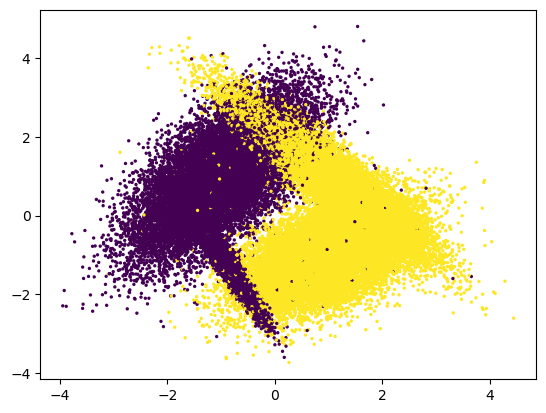

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=2)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

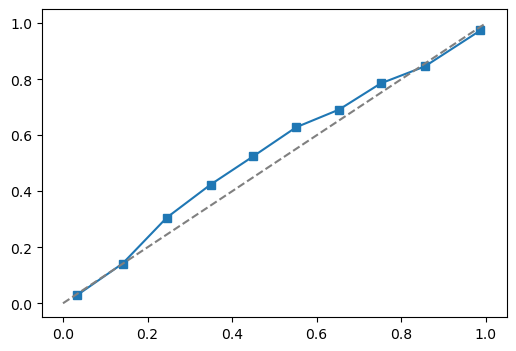

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_predict_proba = clf.predict_proba(X_test)[:, 1]
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)
plt.figure(figsize=(6, 4))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.show()

### <font color = 'red' size = 5>Задание 4 </font>


1. На искусственных и реальных данных приведите пример на искусственных и реальных данных, когда модель плохо откалибрована. Графически подтвердите!
2. Используя изотоническую регрессию и логистическую регрессию исправьте калибровку моделей.
3. В чём принципиальная разница между данными подходами? Докажите вычислениями!

In [ ]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

In [ ]:
def plot_calibration_curve(y_true, probs, name):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, probs, n_bins=10, strategy='uniform')
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=f"{name}")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")

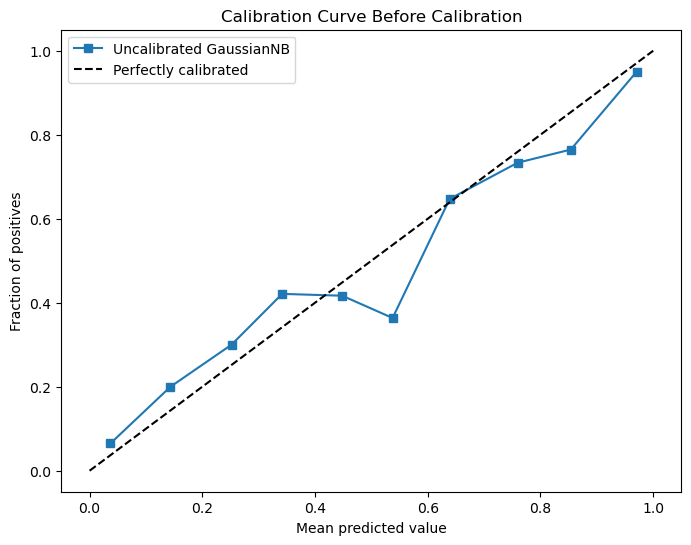

In [ ]:
plt.figure(figsize=(8, 6))
plot_calibration_curve(y_test, probs, "Uncalibrated GaussianNB")
plt.title("Calibration Curve Before Calibration")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.legend()
plt.show()

In [ ]:
calibrated_iso = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
calibrated_iso.fit(X_test, y_test)
probs_iso = calibrated_iso.predict_proba(X_test)[:, 1]

calibrated_sigmoid = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_sigmoid.fit(X_test, y_test)
probs_sigmoid = calibrated_sigmoid.predict_proba(X_test)[:, 1]

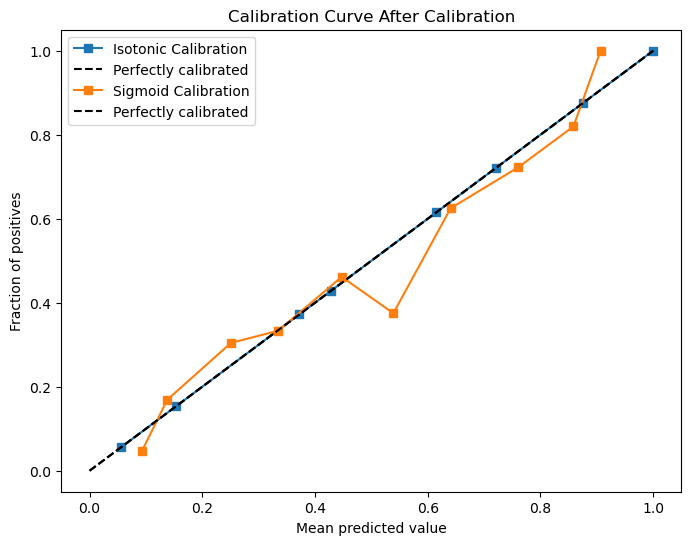

In [ ]:
plt.figure(figsize=(8, 6))
plot_calibration_curve(y_test, probs_iso, "Isotonic Calibration")
plot_calibration_curve(y_test, probs_sigmoid, "Sigmoid Calibration")
plt.title("Calibration Curve After Calibration")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_data = load_breast_cancer()
X_real, y_real = breast_data.data, breast_data.target
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

model_real = GaussianNB()
model_real.fit(X_train_real, y_train_real)
probs_real = model_real.predict_proba(X_test_real)[:, 1]


In [ ]:
calibrated_iso_real = CalibratedClassifierCV(model_real, method='isotonic', cv='prefit')
calibrated_iso_real.fit(X_test_real, y_test_real)
probs_iso_real = calibrated_iso_real.predict_proba(X_test_real)[:, 1]

calibrated_sigmoid_real = CalibratedClassifierCV(model_real, method='sigmoid', cv='prefit')
calibrated_sigmoid_real.fit(X_test_real, y_test_real)
probs_sigmoid_real = calibrated_sigmoid_real.predict_proba(X_test_real)[:, 1]

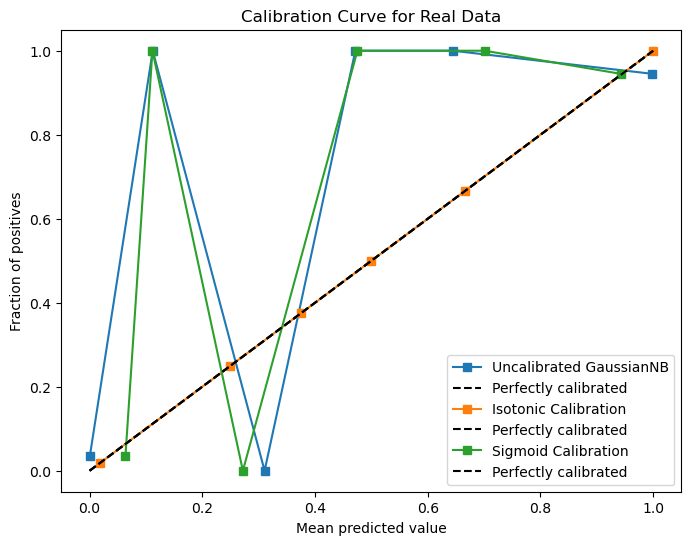

In [ ]:
plt.figure(figsize=(8, 6))
plot_calibration_curve(y_test_real, probs_real, "Uncalibrated GaussianNB")
plot_calibration_curve(y_test_real, probs_iso_real, "Isotonic Calibration")
plot_calibration_curve(y_test_real, probs_sigmoid_real, "Sigmoid Calibration")
plt.title("Calibration Curve for Real Data")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.legend()
plt.show()

Изотоническая регрессия не предполагает формы зависимости и эффективно работает на больших объемах данных, но чувствительна к переобучению.
Логистическая регрессия предполагает сигмоидальную зависимость, что делает её более устойчивой к переобучению, но может быть менее точной на сложных распределениях.